In [6]:
#studying kk virality
import numpy as np
import pandas as pd
data=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/kim_virality.csv', header=0, sep=',')

In [7]:
data=data.rename(columns={'week':'ds','hits':'y'})
data['ds']=pd.to_datetime(data['ds'])


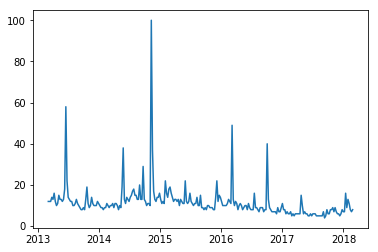

In [13]:
import matplotlib.pyplot as plt
plt.plot(data['ds'],data['y']) #quite obviously there are virality spikes here

In [14]:
import fbprophet
data_prophet=fbprophet.Prophet(changepoint_prior_scale=0.15)
data_prophet.fit(data)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
data_forecast=data_prophet.make_future_dataframe(periods=365,freq='D')
data_forecast=data_prophet.predict(data_forecast)

Text(0.5,1,'KK searches over the period')

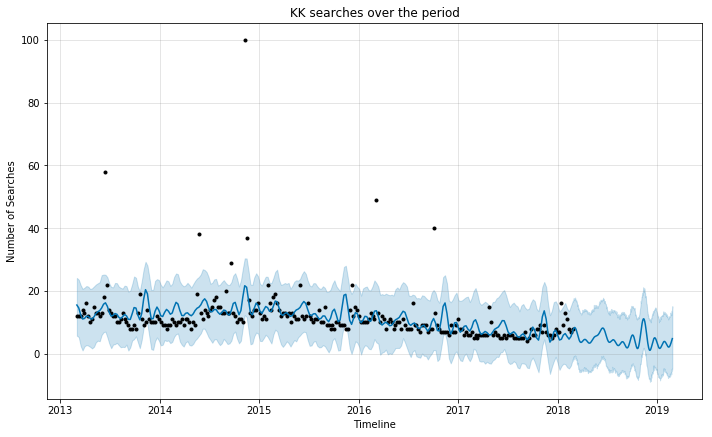

In [19]:
data_prophet.plot(data_forecast, xlabel='Timeline',ylabel='Number of Searches')
plt.title('KK searches over the period')

In [20]:
data_prophet.changepoints #still at regular inetervals

8     2013-04-28
17    2013-06-30
25    2013-08-25
33    2013-10-20
42    2013-12-22
50    2014-02-16
58    2014-04-13
67    2014-06-15
75    2014-08-10
83    2014-10-05
92    2014-12-07
100   2015-02-01
108   2015-03-29
116   2015-05-24
125   2015-07-26
133   2015-09-20
141   2015-11-15
150   2016-01-17
158   2016-03-13
166   2016-05-08
175   2016-07-10
183   2016-09-04
191   2016-10-30
200   2017-01-01
208   2017-02-26
Name: ds, dtype: datetime64[ns]

In [22]:
data_prophet1=fbprophet.Prophet(changepoint_prior_scale=0.3)
data_prophet1.fit(data)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
data_forecast1=data_prophet.make_future_dataframe(periods=365*3, freq='D')
data_forecast1=data_prophet1.predict(data_forecast1)

Text(0.5,1,'Prediction and outliers at 0.30')

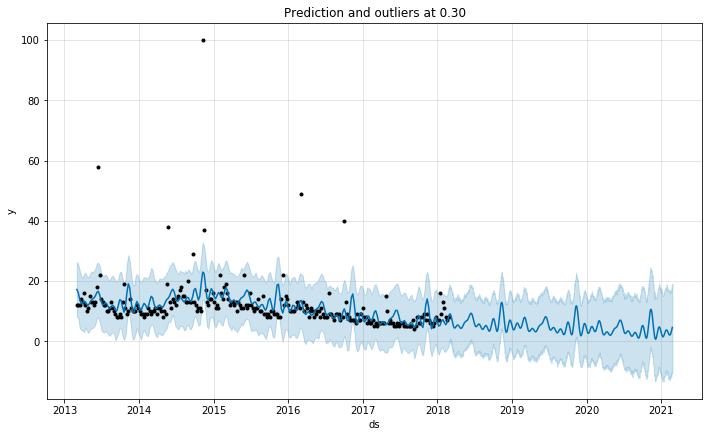

In [27]:
data_prophet1.plot(data_forecast1)
plt.title('Prediction and outliers at 0.30')

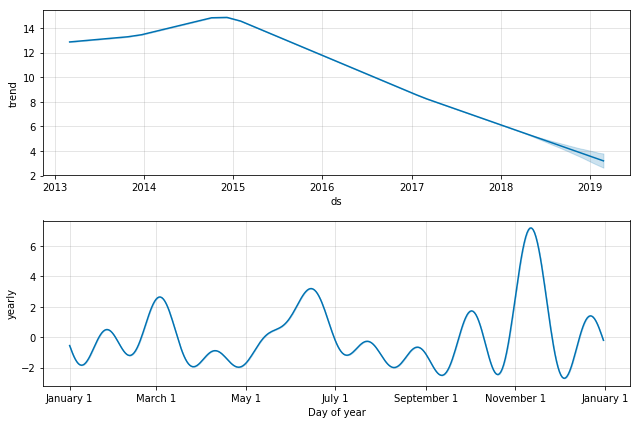

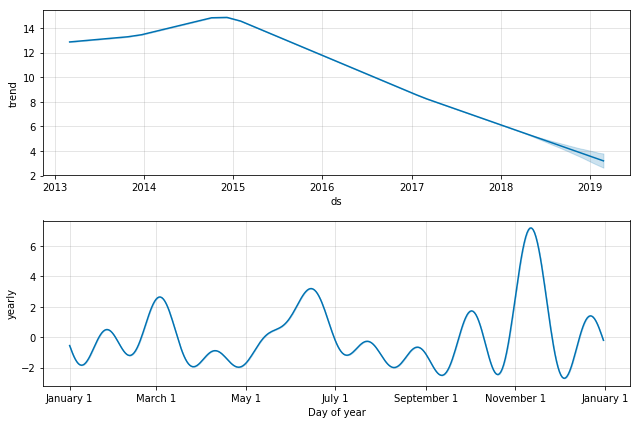

In [30]:
data_prophet.plot_components(data_forecast)

In [32]:
data_forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
0,2013-03-03,12.869735,12.869735,12.869735,5.730557,24.168321,2.642340,2.642340,2.642340,2.642340,2.642340,2.642340,2.642340,2.642340,2.642340,15.512075
1,2013-03-10,12.881859,12.881859,12.881859,5.287982,23.583392,1.698723,1.698723,1.698723,1.698723,1.698723,1.698723,1.698723,1.698723,1.698723,14.580582
2,2013-03-17,12.893983,12.893983,12.893983,2.477084,21.866812,-0.461249,-0.461249,-0.461249,-0.461249,-0.461249,-0.461249,-0.461249,-0.461249,-0.461249,12.432734
3,2013-03-24,12.906108,12.906108,12.906108,1.027665,20.653863,-1.849533,-1.849533,-1.849533,-1.849533,-1.849533,-1.849533,-1.849533,-1.849533,-1.849533,11.056574
4,2013-03-31,12.918232,12.918232,12.918232,2.322472,21.034102,-1.683049,-1.683049,-1.683049,-1.683049,-1.683049,-1.683049,-1.683049,-1.683049,-1.683049,11.235183
5,2013-04-07,12.930356,12.930356,12.930356,2.771494,21.580215,-0.991569,-0.991569,-0.991569,-0.991569,-0.991569,-0.991569,-0.991569,-0.991569,-0.991569,11.938786
6,2013-04-14,12.942480,12.942480,12.942480,2.557354,21.369035,-1.031677,-1.031677,-1.031677,-1.031677,-1.031677,-1.031677,-1.031677,-1.031677,-1.031677,11.910803
7,2013-04-21,12.954604,12.954604,12.954604,2.162548,20.596172,-1.709537,-1.709537,-1.709537,-1.709537,-1.709537,-1.709537,-1.709537,-1.709537,-1.709537,11.245067
8,2013-04-28,12.966728,12.966728,12.966728,1.685812,20.840597,-1.940817,-1.940817,-1.940817,-1.940817,-1.940817,-1.940817,-1.940817,-1.940817,-1.940817,11.025911
9,2013-05-05,12.978852,12.978852,12.978852,2.220450,21.447791,-1.216809,-1.216809,-1.216809,-1.216809,-1.216809,-1.216809,-1.216809,-1.216809,-1.216809,11.762043


In [35]:
len(data_forecast['trend'])

626

In [34]:
len(data)

261

In [36]:
data_pred=data_forecast['yhat_upper']

In [38]:
data_pred=data_pred[:261]

In [42]:
virals=data['y']-data_pred

In [44]:
data['virals']=virals

In [46]:
popularity=data.loc[data['virals']>0]

In [47]:
popularity

,ds,y,virals
15,2013-06-16,58,32.837684
64,2014-05-25,38,13.546506
81,2014-09-21,29,6.197647
88,2014-11-09,100,69.612432
89,2014-11-16,37,6.644882
144,2015-12-06,22,2.955099
157,2016-03-06,49,26.465822
187,2016-10-02,40,19.713057
254,2018-01-14,16,1.899823


In [48]:
#maybe this one could now be matched to other happenings in the rest of the set. KK got engaged etc.

In [50]:
data.corr()

,y,virals
y,1.000000,0.906685
virals,0.906685,1.000000
